# MDS_Assignment4_B09705039_劉惟恩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(suppress=True)

## 1.

### (a)

In [3]:
# Read Data
SECOM_data_df = pd.read_excel("MDS_Assignment4_SECOM.xlsx", sheet_name = "secom", index_col = 0)
# print dataframe
display(SECOM_data_df)
# Print summary
SECOM_data_df.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
4,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
5,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1564,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1565,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1566,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [4]:
# Data Preprocessing

# define dataset
SECOM_data_df = SECOM_data_df.drop(["Time"], axis = 1)

# Remove null > 40%
def remove_null(df, thres):
    columns = df.columns
    cols_remove = []
    for i in columns:
        if (df[i].isna().sum() / df.shape[0] >= thres):
            cols_remove.append(i)
    print('Number of features removed with more than 40% of null values :', len(cols_remove))
    df = df.drop(labels=cols_remove, axis=1)
    return (df)

SECOM_data_df = remove_null(SECOM_data_df,0.4)

# Conduct KNN to impute the rest missing values
# import the KNNimputer class
from sklearn.impute import KNNImputer

def imputer(df):   
    impute = KNNImputer()
    df_imputed = pd.DataFrame(impute.fit_transform(df),columns=df.columns)
    return(df_imputed)

SECOM_data_df = imputer(SECOM_data_df)

# Remove equal value features
def remove_duplicates(df):
    df_std = df.std()
    duplicate_features = df_std[df_std == 0].index
    print('Number of features removed with same row values :', len(duplicate_features))
    df = df.drop(labels=duplicate_features, axis=1)
    return (df)

SECOM_data_df = remove_duplicates(SECOM_data_df)

# Correlated independent features
def remove_corr(df, threshold):
    corr = pd.DataFrame(abs(df.corr()))

    Featurei = []
    Featurej = []
    Corr = []

    for i in corr.index:
        for j in corr.columns:
            if (corr.loc[i, j] > threshold and i != j):
                if(i not in Featurei):
                    Featurei.append(i)
                if(j not in Featurej):
                    Featurej.append(j)
                    Corr.append(corr.loc[i, j])
    
    d = pd.DataFrame([Featurei, Featurej, Corr]).transpose()
    
    to_drop = set(d[0])
    print('Number of features removed = ', len(to_drop))
    
    return (df.drop(to_drop, axis=1))

SECOM_data_df = remove_corr(SECOM_data_df, 0.9)

Number of features removed with more than 40% of null values : 32
Number of features removed with same row values : 116
Number of features removed =  303


In [5]:
def default_model(X_train,y_train,X_test,y_test,model):
    model = model
    model.fit(X_train, y_train)
    
    print('Accuracy Score of train data = ', model.score(X_train,y_train))
    print('Accuracy Score of test data  = ', model.score(X_test,y_test))
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('f1-Score of train data =', f1_score(y_train, y_pred_train))
    print('f1-Score of test data  =', f1_score(y_test, y_pred))

    print('\n Classification Report for Test Data \n')
    print(metrics.classification_report(y_test, y_pred))
    
    return model

### Oversampling

In [6]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# define dataset
X = SECOM_data_df.drop(["Label"], axis = 1)
y =  SECOM_data_df["Label"]
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
f1_scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
f1_score = mean(f1_scores)
print('F1 Score: %.3f' % f1_score)
accuracy = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy = mean(accuracy)
print('accuracy: %.3f' % accuracy)

F1 Score: 0.883
accuracy: 0.883


### Undersampling

In [7]:
# example of evaluating a decision tree with random undersampling
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# define dataset
X = SECOM_data_df.drop(["Label"], axis = 1)
y =  SECOM_data_df["Label"]
# define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
f1_scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
f1_score = mean(f1_scores)
print('F1 Score: %.3f' % f1_score)
accuracy = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy = mean(accuracy)
print('accuracy: %.3f' % accuracy)

F1 Score: 0.572
accuracy: 0.581


reference: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

### Borderline SMOTE

In [8]:
# example of evaluating a decision tree with Borderline SMOTE
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE

# define dataset
X = SECOM_data_df.drop(["Label"], axis = 1)
y =  SECOM_data_df["Label"]
# define pipeline
steps = [('under', BorderlineSMOTE(random_state=42)), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
f1_scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
f1_score = mean(f1_scores)
print('F1 Score: %.3f' % f1_score)
accuracy = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
accuracy = mean(accuracy)
print('accuracy: %.3f' % accuracy)

F1 Score: 0.842
accuracy: 0.835


### (b)

We suggest to use random oversampling. By doing Decision Tree Classification after balancing we can obtian the accuracy and F1-score of the three different balancing methods. Oversampling has the highest accuracy and the highest f1_score which means better performance after balancing the data.

### (c)

In [9]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# define dataset
X = SECOM_data_df.drop(["Label"], axis = 1)
y =  SECOM_data_df["Label"]
print('Original dataset shape %s' % Counter(y))

# 
fpr_arr = []
fnr_arr = []
small_large = []
for i in np.arange(0.1, 1.1, 0.1):
    ros = RandomOverSampler(random_state=42, sampling_strategy=i)
    X_res, y_res = ros.fit_resample(X, y)
    x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

    # fit model
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    # print(i, tn, fp, fn, tp)
    # Fall out or false positive rate
    fpr_arr.append(fp/(fp+tn))
    # False negative rate
    fnr_arr.append(fn/(tp+fn))
    small_large.append(round(i, 2))

Original dataset shape Counter({-1.0: 1463, 1.0: 104})


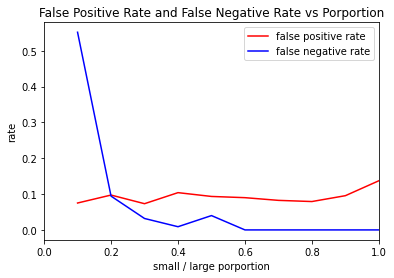

In [10]:
plt.plot(small_large, fpr_arr, color='red', label='false positive rate')
plt.plot(small_large, fnr_arr, color='blue', label='false negative rate')
plt.xlim([0, 1])
plt.xlabel('small / large porportion')
plt.ylabel('rate')
plt.title('False Positive Rate and False Negative Rate vs Porportion')
plt.legend()
plt.show()

The best porportion is small group / large group = 0.8. Since we want to decrease false positive rate and false negative rate. The false negative rate keeps decreasing while the false positive rate increses after 0.8.

### (d)

It depends on the attribute of the dataset and the result we want. If feature selection is done before data balancing the feature selection process may be biased towards the majority class, which is more representative of the true distribution of the natural data causing the prediction of majority class data to be better than the minority class data. In the other hand, if feature selection is done after data balancing minority class predictions may be more accurate which is the goal of some datasets. So, if we consider the original statistical distribution to be more important, we should do feature selection before data balancing. Otherwise, if accuracy of minority class is more important that the original data distribution, we should do feature selection after data balancing.

## 2.

### (b)

In [11]:
import pandas as pd
import random as rd
from itertools import combinations
import math
import time

class TS():
    def __init__(self, seed, tabu_tenure):
        self.seed = seed
        self.tabu_tenure = tabu_tenure
        self.instance_dict = self.input_data()
        self.Initial_solution = self.get_InitialSolution()
        self.tabu_str, self.Best_solution, self.Best_objvalue = self.TSearch()

    def input_data(self):
        '''Takes the path of the excel file of the SMTWTP instances.
        Returns a dict of jobs number as Key and weight, processing time (hours) and due date (hours) as values.
        '''
        data = {"processing_time": [10,10,13,4,9,4,8,15,7,1,9,3,15,9,11,6,5,14,18,3],
                "due_date": [50,38,49,12,20,105,73,45,6,64,15,6,92,43,78,21,15,50,150,99],
                "weight": [10,5,1,5,10,1,5,10,5,1,5,10,10,5,1,10,5,5,1,5],
                "Job": range(1, 21)}
        df = pd.DataFrame(data)
        # Rearranging index
        df.index = np.arange(1, len(df) + 1)
        
        return df.to_dict('index')

    def get_tabuestructure(self):
        '''Takes a dict (input data)
        Returns a dict of tabu attributes(pair of jobs that are swapped) as keys and [tabu_time, MoveValue]
        '''
        dict = {}
        for swap in combinations(self.instance_dict.keys(), 2):
            dict[swap] = {'tabu_time': 0, 'MoveValue': 0}
        return dict

    def get_InitialSolution(self, show=False):
        n_jobs = len(self.instance_dict) # Number of jobs
        # Producing a random schedule of jobs
        initial_solution = list(range(1, n_jobs+1))
        rd.seed(self.seed)
        rd.shuffle(initial_solution)
        if show == True:
            print("initial Random Solution: {}".format(initial_solution))
        return initial_solution

    def Objfun(self, solution, show = False):
        '''Takes a set of scheduled jobs, dict (input data)
        Return the objective function value of the solution
        '''
        dict = self.instance_dict
        t = 0   #starting time
        objfun_value = 0
        for job in solution:
            C_i = t + dict[job]["processing_time"]  # Completion time
            d_i = dict[job]["due_date"]   # due date of the job
            T_i = max(0, C_i - d_i)    #tardiness for the job
            W_i = dict[job]["weight"]  # job's weight

            objfun_value +=  W_i * T_i
            t = C_i
        # if show == True:
            # print("\n","#"*8, "The Objective function value for {} solution schedule is: {}".format(solution ,objfun_value),"#"*8)
        return objfun_value

    def SwapMove(self, solution, i ,j):
        '''Takes a list (solution)
        returns a new neighbor solution with i, j swapped
       '''
        solution = solution.copy()
        # job index in the solution:
        i_index = solution.index(i)
        j_index = solution.index(j)
        #Swap
        solution[i_index], solution[j_index] = solution[j_index], solution[i_index]
        return solution

    def TSearch(self):
        '''The implementation Tabu search algorithm with short-term memory and pair_swap as Tabu attribute.
        '''
        # Parameters:
        tenure =self.tabu_tenure
        tabu_structure = self.get_tabuestructure()  # Initialize the data structures
        best_solution = self.Initial_solution
        best_objvalue = self.Objfun(best_solution)
        current_solution = self.Initial_solution
        current_objvalue = self.Objfun(current_solution)

        # print("#"*30, "Short-term memory TS with Tabu Tenure: {}\nInitial Solution: {}, Initial Objvalue: {}".format(tenure, current_solution, current_objvalue), "#"*30, sep='\n\n')
        start_time = time.time()
        iter = 1
        Terminate = 0
        while Terminate < 100:
            # print('\n\n### iter {}###  Current_Objvalue: {}, Best_Objvalue: {}'.format(iter, current_objvalue,best_objvalue))
            # Searching the whole neighborhood of the current solution:
            for move in tabu_structure:
                candidate_solution = self.SwapMove(current_solution, move[0], move[1])
                candidate_objvalue = self.Objfun(candidate_solution)
                tabu_structure[move]['MoveValue'] = candidate_objvalue

            # Admissible move
            while True:
                # select the move with the lowest ObjValue in the neighborhood (minimization)
                best_move = min(tabu_structure, key =lambda x: tabu_structure[x]['MoveValue'])
                MoveValue = tabu_structure[best_move]["MoveValue"]
                tabu_time = tabu_structure[best_move]["tabu_time"]
                # Not Tabu
                if tabu_time < iter:
                    # make the move
                    current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                    current_objvalue = self.Objfun(current_solution)
                    # Best Improving move
                    if MoveValue < best_objvalue:
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        # print("   best_move: {}, Objvalue: {} => Best Improving => Admissible".format(best_move, current_objvalue))
                        Terminate = 0
                    else:
                        # print("   ##Termination: {}## best_move: {}, Objvalue: {} => Least non-improving => "
                        #       "Admissible".format(Terminate,best_move,current_objvalue))
                        Terminate += 1
                    # update tabu_time for the move
                    tabu_structure[best_move]['tabu_time'] = iter + tenure
                    iter += 1
                    break
                # If tabu
                else:
                    # Aspiration
                    if MoveValue < best_objvalue:
                        # make the move
                        current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                        current_objvalue = self.Objfun(current_solution)
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        # print("   best_move: {}, Objvalue: {} => Aspiration => Admissible".format(best_move, current_objvalue))
                        Terminate = 0
                        iter += 1
                        break
                    else:
                        tabu_structure[best_move]["MoveValue"] = float('inf')
                        # print("   best_move: {}, Objvalue: {} => Tabu => Inadmissible".format(best_move, current_objvalue))
                        continue
        tardy_count = 0
        now_time = 0
        for i in best_solution:
            now_time += self.instance_dict[i]["processing_time"]
            if self.instance_dict[i]["due_date"] < now_time:
                tardy_count += 1
                
        print("Optimal Solution: {}".format(best_solution), "Optimal function value: {}".format(best_objvalue), 
              'Running time: %s'% (time.time() - start_time), "Number of tardy jobs: {}".format(tardy_count), sep="\n")
        print()
        
        global objv
        objv = best_objvalue
        return tabu_structure, best_solution, best_objvalue

test = TS(seed = 2012, tabu_tenure=3)

Optimal Solution: [12, 4, 17, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal function value: 1928
Running time: 0.11535501480102539
Number of tardy jobs: 14



### trial-and-error

In [12]:
obj_arr = []
for i in [3, 5, 10, 20, 40, 80, 100]:
    test = TS(seed = 2012, tabu_tenure=i)
    obj_arr.append(objv)

Optimal Solution: [12, 4, 17, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal function value: 1928
Running time: 0.10181617736816406
Number of tardy jobs: 14

Optimal Solution: [12, 4, 17, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal function value: 1928
Running time: 0.10126113891601562
Number of tardy jobs: 14

Optimal Solution: [12, 4, 17, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal function value: 1928
Running time: 0.10362482070922852
Number of tardy jobs: 14

Optimal Solution: [12, 4, 17, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal function value: 1928
Running time: 0.10743379592895508
Number of tardy jobs: 14

Optimal Solution: [12, 4, 17, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal function value: 1928
Running time: 0.11179518699645996
Number of tardy jobs: 14

Optimal Solution: [12, 4, 17, 16, 5, 9, 8, 1, 14, 10, 7, 13, 20, 11, 2, 18, 6, 15, 3, 19]
Optimal functio

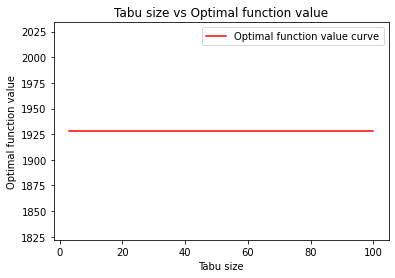

In [13]:
plt.plot([3, 5, 10, 20, 40, 80, 100], obj_arr, color='red', label='Optimal function value curve')
plt.xlabel('Tabu size')
plt.ylabel('Optimal function value')
plt.title('Tabu size vs Optimal function value')
plt.legend()
plt.show()

We learned that optimal solution doesn't changes while changing Tabu size. Thus we use the first result as the best result.

reference: https://medium.com/swlh/tabu-search-in-python-3199c44d44f1

### (c)

In [14]:
# importing required modules
import pandas as pd
import numpy as np
import time

def GA (crossover, mutation):
    ''' ================= initialization setting ======================'''
    num_job=20 # number of jobs

    p=[10,10,13,4,9,4,8,15,7,1,9,3,15,9,11,6,5,14,18,3]
    d=[50,38,49,12,20,105,73,45,6,64,15,6,92,43,78,21,15,50,150,99]
    w=[10,5,1,5,10,1,5,10,5,1,5,10,10,5,1,10,5,5,1,5]
    # raw_input is used in python 2
    population_size=int(30) # default value is 30
    crossover_rate=float(crossover) # default value is 0.8
    mutation_rate=float(mutation) # default value is 0.1
    mutation_selection_rate=float(0.5)
    num_mutation_jobs=round(num_job*mutation_selection_rate)
    num_iteration=int(2000) # default value is 2000

    start_time = time.time()

    '''==================== main code ==============================='''
    '''----- generate initial population -----'''
    Tbest=999999999999999
    best_list,best_obj=[],[]
    population_list=[]
    for i in range(population_size):
        nxm_random_num=list(np.random.permutation(num_job)) # generate a random permutation of 0 to num_job*num_mc-1
        population_list.append(nxm_random_num) # add to the population_list

    for n in range(num_iteration):
        Tbest_now=99999999999           
        '''-------- crossover --------'''
        parent_list=population_list[:]
        offspring_list=population_list[:]
        S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover

        for m in range(int(population_size/2)):
            crossover_prob=np.random.rand()
            if crossover_rate>=crossover_prob:
                parent_1= population_list[S[2*m]][:]
                parent_2= population_list[S[2*m+1]][:]
                child_1=['na' for i in range(num_job)]
                child_2=['na' for i in range(num_job)]
                fix_num=round(num_job/2)
                g_fix=list(np.random.choice(num_job, fix_num, replace=False))

                for g in range(fix_num):
                    child_1[g_fix[g]]=parent_2[g_fix[g]]
                    child_2[g_fix[g]]=parent_1[g_fix[g]]
                c1=[parent_1[i] for i in range(num_job) if parent_1[i] not in child_1]
                c2=[parent_2[i] for i in range(num_job) if parent_2[i] not in child_2]

                for i in range(num_job-fix_num):
                    child_1[child_1.index('na')]=c1[i]
                    child_2[child_2.index('na')]=c2[i]
                offspring_list[S[2*m]]=child_1[:]
                offspring_list[S[2*m+1]]=child_2[:]

        '''--------mutataion--------'''   
        for m in range(len(offspring_list)):
            mutation_prob=np.random.rand()
            if mutation_rate >= mutation_prob:
                m_chg=list(np.random.choice(num_job, num_mutation_jobs, replace=False)) # chooses the position to mutation
                t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
                for i in range(num_mutation_jobs-1):
                    offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement

                offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position


        '''--------fitness value (calculate tardiness)-------------'''
        total_chromosome=parent_list[:]+offspring_list[:] # combine parent and offspring chromosomes
        chrom_fitness,chrom_fit=[],[]
        total_fitness=0
        for i in range(population_size*2):
            ptime=0
            tardiness=0
            for j in range(num_job):
                ptime=ptime+p[total_chromosome[i][j]]
                tardiness=tardiness+w[total_chromosome[i][j]]*max(ptime-d[total_chromosome[i][j]],0)
            chrom_fitness.append(1/tardiness)
            chrom_fit.append(tardiness)
            total_fitness=total_fitness+chrom_fitness[i]

        '''----------selection----------'''
        pk,qk=[],[]

        for i in range(population_size*2):
            pk.append(chrom_fitness[i]/total_fitness)
        for i in range(population_size*2):
            cumulative=0
            for j in range(0,i+1):
                cumulative=cumulative+pk[j]
            qk.append(cumulative)

        selection_rand=[np.random.rand() for i in range(population_size)]

        for i in range(population_size):
            if selection_rand[i]<=qk[0]:
                population_list[i][:]=total_chromosome[0][:]
                break
            else:
                for j in range(0,population_size*2-1):
                    if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                        population_list[i][:]=total_chromosome[j+1][:]

        '''----------comparison----------'''
        for i in range(population_size*2):
            if chrom_fit[i]<Tbest_now:
                Tbest_now=chrom_fit[i]
                sequence_now=total_chromosome[i][:]

        if Tbest_now<=Tbest:
            Tbest=Tbest_now
            sequence_best=sequence_now[:]

        job_sequence_ptime=0
        num_tardy=0
        for k in range(num_job):
            job_sequence_ptime=job_sequence_ptime+p[sequence_best[k]]
            if job_sequence_ptime>d[sequence_best[k]]:
                num_tardy=num_tardy+1
    '''----------result----------'''
    print("Optimal solution",sequence_best)
    print("Optimal function value:%f"%Tbest)
    # print("average tardiness:%f"%(Tbest/num_job))
    print('Running time:%s'% (time.time() - start_time))
    print("Number of tardy jobs:%d"%num_tardy)
    print()
    return Tbest

### trial-and-error

In [15]:
i_arr = []
j_arr = []
obj_arr = []
for i in [0.1, 0.8, 1]:
    for j in [0.1, 0.8, 1]:
        result = GA(i, j)
        i_arr.append(i)
        j_arr.append(j)
        obj_arr.append(result)

Optimal solution [3, 15, 4, 19, 11, 9, 10, 7, 16, 0, 6, 8, 1, 17, 13, 12, 18, 5, 14, 2]
Optimal function value:2553.000000
Running time:2.068643808364868
Number of tardy jobs:13

Optimal solution [14, 18, 4, 11, 8, 10, 2, 15, 16, 19, 6, 13, 9, 7, 0, 5, 1, 17, 12, 3]
Optimal function value:2823.000000
Running time:2.314301013946533
Number of tardy jobs:17

Optimal solution [15, 5, 10, 9, 7, 16, 14, 2, 17, 13, 18, 19, 4, 11, 12, 0, 3, 1, 8, 6]
Optimal function value:2443.000000
Running time:2.3785641193389893
Number of tardy jobs:14

Optimal solution [3, 9, 16, 8, 11, 4, 6, 0, 10, 15, 5, 19, 7, 1, 13, 17, 18, 2, 14, 12]
Optimal function value:2183.000000
Running time:9.934271097183228
Number of tardy jobs:12

Optimal solution [8, 15, 11, 9, 10, 0, 3, 5, 4, 16, 7, 13, 19, 12, 6, 1, 14, 17, 2, 18]
Optimal function value:2622.000000
Running time:10.155545234680176
Number of tardy jobs:15

Optimal solution [11, 15, 9, 4, 8, 3, 0, 12, 16, 13, 7, 5, 1, 17, 10, 14, 6, 19, 2, 18]
Optimal functio

In [16]:
data = {"crossover rate": i_arr,
       "mutation rate": j_arr,
       "total weighted tardiness": obj_arr}
resultdf = pd.DataFrame(data)
display(resultdf.sort_values(by=['total weighted tardiness']))

,crossover rate,mutation rate,total weighted tardiness
6,1.0,0.1,2140
3,0.8,0.1,2183
2,0.1,1.0,2443
0,0.1,0.1,2553
8,1.0,1.0,2596
4,0.8,0.8,2622
7,1.0,0.8,2663
5,0.8,1.0,2815
1,0.1,0.8,2823


According to the result when crossover rate = 1, mutation rate = 0.1 has the minimum total weighted tardiness, thus we pick the 8th result as the best result.

reference: https://github.com/wurmen/Genetic-Algorithm-for-Job-Shop-Scheduling-and-NSGA-II/blob/master/implementation%20with%20python/GA-flowshop/GA%20for%20flow%20shop%20problem.md

## 3.

### (a)

In [1]:
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

class Node():

    def __init__(
        self, center, radius, label,
        facecolor='#2653de', edgecolor='#e6e6e6',
        ring_facecolor='#a3a3a3', ring_edgecolor='#a3a3a3',
        **kwargs
        ):
        """
        Initializes a Markov Chain Node(for drawing purposes)
        Inputs:
            - center : Node (x,y) center
            - radius : Node radius
            - label  : Node label
        """
        self.center = center
        self.radius = radius
        self.label  = label

        # For convinience: x, y coordinates of the center
        self.x = center[0]
        self.y = center[1]

        # Drawing config
        self.node_facecolor = facecolor
        self.node_edgecolor = edgecolor

        self.ring_facecolor = ring_facecolor
        self.ring_edgecolor = ring_edgecolor
        self.ring_width = 0.03

        self.text_args = {
            'ha': 'center',
            'va': 'center',
            'fontsize': kwargs.get("node_fontsize", 12)
        }


    def add_circle(self, ax):
        """
        Add the annotated circle for the node
        """
        circle = mpatches.Circle(self.center, self.radius)
        p = PatchCollection(
            [circle],
            edgecolor = self.node_edgecolor,
            facecolor = self.node_facecolor
        )
        ax.add_collection(p)
        ax.annotate(
            self.label,
            xy = self.center,
            color = '#ffffff',
            **self.text_args
        )


    def add_self_loop(self, ax, prob=None, direction='up', annotate = True, percentages = False):
        """
        Draws a self loop
        """
        if direction == 'up':
            start = -30
            angle = 180
            ring_x = self.x
            ring_y = self.y + self.radius
            prob_y = self.y + 1.3*self.radius
            x_cent = ring_x - self.radius + (self.ring_width/2)
            y_cent = ring_y - 0.15
        else:
            start = -210
            angle = 0
            ring_x = self.x
            ring_y = self.y - self.radius
            prob_y = self.y - 1.4*self.radius
            x_cent = ring_x + self.radius - (self.ring_width/2)
            y_cent = ring_y + 0.15

        # Add the ring
        ring = mpatches.Wedge(
            (ring_x, ring_y),
            self.radius,
            start,
            angle,
            width = self.ring_width
        )
        # Add the triangle (arrow)
        offset = 0.2
        left   = [x_cent - offset, ring_y]
        right  = [x_cent + offset, ring_y]
        bottom = [(left[0]+right[0])/2., y_cent]
        arrow  = plt.Polygon([left, right, bottom, left])

        p = PatchCollection(
            [ring, arrow],
            edgecolor = self.ring_edgecolor,
            facecolor = self.ring_facecolor
        )
        ax.add_collection(p)

        # Probability to add?
        if prob and annotate:
            text = f"{prob*100 if percentages else prob:.1f}".rstrip("0").rstrip(".")
            text += "%" if percentages else ""
            ax.annotate(text, xy=(self.x, prob_y), color='#000000', **self.text_args)

            
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

class MarkovChain:

    def __init__(self, M, labels, **kwargs):
        """
        Initializes a Markov Chain (for drawing purposes)
        Inputs:
            - M         Transition Matrix
            - labels    State Labels
            - kwargs    Keywords to modify how data is displayed, specifically:
                        annotate          if False, probabilities aren't shown
                        arrow_edgecolor
                        arrow_facecolor
                        arrow_head_width
                        arrow_width
                        fontsize          affects transition probability labels
                        node_edgecolor
                        node_facecolor
                        node_fontsize     affects node labels
                        node_radius
                        percentages       bool, if True probabilites should be
                                          displayed as percentages instead of decimals
                        transparency_func function to determine transparency of arrows (default: alpha = prob)
        """

        np.set_printoptions(precision=3,suppress=True)



        if M.shape[0] < 2:
            raise Exception("There should be at least 2 states")
        if M.shape[0] != M.shape[1]:
            raise Exception("Transition matrix should be square")
        if M.shape[0] != len(labels):
            raise Exception("There should be as many labels as states")

        # save args
        self.M = M
        self.n_states = M.shape[0]
        self.labels = labels

        self.save_kwargs(**kwargs)



        # Build the network
        self.build_network()

    def save_kwargs(self, **kwargs):

        # save the dictionary
        self.kwargs = kwargs

        # Colors
        self.arrow_facecolor = self.kwargs.get("arrow_facecolor", '#a3a3a3')
        self.arrow_edgecolor = self.kwargs.get("arrow_edgecolor", '#a3a3a3')
        self.node_facecolor = self.kwargs.get("node_facecolor", '#2693de')
        self.node_edgecolor = self.kwargs.get("node_edgecolor", '#e6e6e6')

        # Drawing config
        self.node_radius = self.kwargs.get("node_radius", 0.60)
        self.arrow_width = self.kwargs.get("arrow_width", 0.1)
        self.arrow_head_width = self.kwargs.get("arrow_head_width", 0.22)
        self.text_args = {
            'ha': 'center',
            'va': 'center',
            'fontsize': self.kwargs.get("fontsize", 14)
        }

        # How to represent the probabilities
        self.percentages = self.kwargs.get("percentages", False)
        self.annotate_probabilities = self.kwargs.get("annotate", True)
        self.transparency_func = self.kwargs.get("transparency_func", lambda p: p)


    def set_node_centers(self):
        """
            Spread the nodes evenly around in a circle using Euler's formula
            e^(2pi*i*k/n), where n is the number of nodes and k is the
            index over which we iterate. The real part is the x coordinate,
            the imaginary part is the y coordinate. Then scale by n for more room.
            self.node_centers is a numpy array of shape (n,2)
        """

        # For legibility, we use n below
        n = self.n_states

        # generate the evenly spaced coords on the unit circle
        unit_circle_coords = np.fromfunction(lambda x,y:
                        (1-y)*np.real(np.exp(2 * np.pi * x/n * 1j))
                        + y * np.imag(np.exp(2 * np.pi * x/n * 1j)),
                        (n,2))

        self.figsize = (n*2+2, n*2+2)
        self.xlim = (-n-1, n+1)
        self.ylim = (-n-1, n+1)

        # Scale by n to have more room
        self.node_centers = unit_circle_coords * n


    def build_network(self):
        """
        Loops through the matrix, add the nodes
        """
        # Position the node centers
        self.set_node_centers()

        # Set the nodes
        self.nodes = [Node(self.node_centers[i],
                           self.node_radius,
                           self.labels[i],
                           **self.kwargs) for i in range(self.n_states)]


    def add_arrow(self, ax,
                  node1, node2,
                  prob=None, width=None,
                  head_width=None,
                  annotate = True,
                  arrow_spacing = 0.15,
                  transparency_func = None):
        """
        Add a directed arrow between two nodes
        Keywords:
        annotate:                if True, probability is displayed on top of the arrow
        arrow_spacing:           determines space between arrows in opposite directions
        head_width:              width of arrow head
        prob:                    probability of going from node1 to node2
        transparency_func:       function to determine transparency of arrows
        width:                   width of arrow body
        """


        if width is None:
            width = self.arrow_width
        if head_width is None:
            head_width = self.arrow_head_width
        if transparency_func is None:
            transparency_func = self.transparency_func

        # x,y start of the arrow, just touching the starting node
        x_start = node1.x + node1.radius*(node2.x-node1.x)/np.linalg.norm(node2.center-node1.center)
        y_start = node1.y + node1.radius*(node2.y-node1.y)/np.linalg.norm(node2.center-node1.center)

        # find the arrow length so it just touches the ending node
        dx = node2.x-x_start - node2.radius*(node2.x-node1.x)/np.linalg.norm(node2.center-node1.center)
        dy = node2.y-y_start - node2.radius*(node2.y-node1.y)/np.linalg.norm(node2.center-node1.center)


        # calculate offset so arrows in opposite directions are separate

        x_offset = dy / np.sqrt(dx**2+dy**2) * arrow_spacing
        y_offset = -dx / np.sqrt(dx**2+dy**2) * arrow_spacing

        arrow = mpatches.FancyArrow(
            x_start + x_offset,
            y_start + y_offset,
            dx,
            dy,
            width = width,
            head_width = head_width,
            length_includes_head = True
        )
        p = PatchCollection(
            [arrow],
            edgecolor = self.arrow_edgecolor,
            facecolor = self.arrow_facecolor,
            alpha = transparency_func(prob)
        )
        ax.add_collection(p)

        # Add label of probability at coordinates (x_prob, y_prob)
        x_prob = x_start +  0.2*dx + 1.2 * x_offset
        y_prob = y_start +  0.2*dy + 1.2 * y_offset
        if prob and annotate:
            text = f"{prob*100 if self.percentages else prob:.1f}".rstrip("0").rstrip(".")
            text += "%" if self.percentages else ""
            ax.annotate(text, xy=(x_prob, y_prob), color='#000000', **self.text_args)


    def draw(self, img_path=None):
        """
        Draw the Markov Chain
        """
        fig, ax = plt.subplots(figsize=self.figsize)

        # Set the axis limits
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)

        # Draw the nodes
        for node in self.nodes:
            node.add_circle(ax)

        # Add the transitions
        for i in range(self.M.shape[0]):
            for j in range(self.M.shape[1]):
                # self loops
                if i == j and self.M[i,i] > 0:
                    self.nodes[i].add_self_loop(ax,
                                                prob = self.M[i,j],
                                                direction = 'up' if self.nodes[i].y >= 0 else 'down',
                                                annotate = self.annotate_probabilities,
                                                percentages = self.percentages)

                # directed arrows
                elif self.M[i,j] > 0:
                    self.add_arrow(ax,
                                   self.nodes[i],
                                   self.nodes[j],
                                   prob = self.M[i,j],
                                   annotate = self.annotate_probabilities)

        plt.axis('off')
        # Save the image to disk?
        if img_path:
            plt.savefig(img_path)
        plt.show()

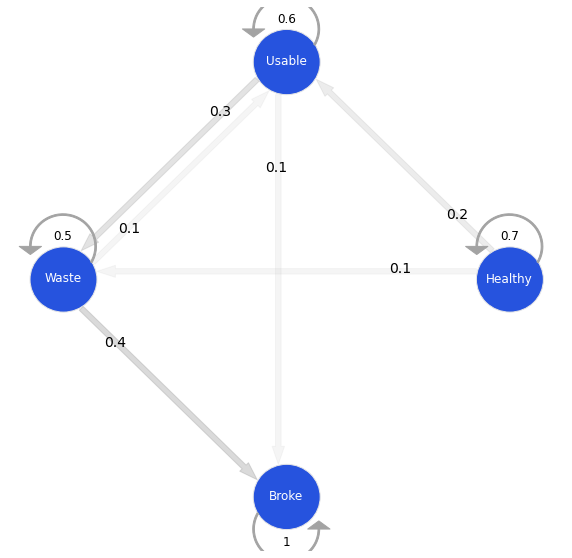

In [2]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([
    [0.7, 0.2, 0.1, 0.0],
    [0.0, 0.6, 0.3, 0.1],
    [0.0, 0.1, 0.5, 0.4],
    [0.0, 0.0, 0.0, 1.0]
])

mc = MarkovChain(P, ['Healthy', 'Usable', 'Waste', 'Broke'])
mc.draw()

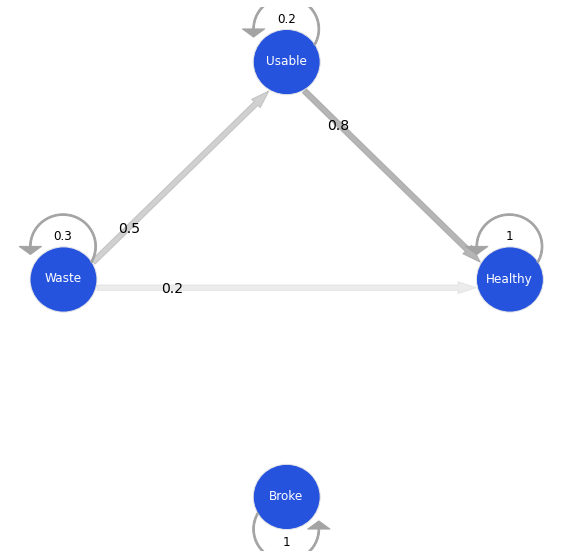

In [3]:
P = np.array([
    [1.0, 0.0, 0.0, 0.0],
    [0.8, 0.2, 0.0, 0.0],
    [0.2, 0.5, 0.3, 0.0],
    [0.0, 0.0, 0.0, 1.0]
])

mc = MarkovChain(P, ['Healthy', 'Usable', 'Waste', 'Broke'])
mc.draw()

reference: https://naysan.ca/2020/07/08/drawing-state-transition-diagrams-in-python/

### (b)

In [4]:
# Initialize Markov Decision Process model
actions = (0, 1)  # actions (0=left, 1=right)
states = (0, 1, 2, 3)  # states (tiles)
rewards = [6, 3 , 1, -15]  # Direct rewards per state
gamma = 0.9  # discount factor
# Transition probabilities per state-action pair
probs = [
    [[0.7, 1.0], [0.2, 0.0], [0.1, 0.0], [0.0, 0.0]],
    [[0.0, 0.8], [0.6, 0.2], [0.3, 0.0], [0.1, 0.0]],
    [[0.0, 0.2], [0.1, 0.5], [0.5, 0.3], [0.4, 0.0]],
    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 1.0]]
]


# Set value iteration parameters
max_iter = 10000  # Maximum number of iterations
delta = 1e-400  # Error tolerance
V = [0, 0, 0, 0]  # Initialize values
pi = [None, None, None, None]  # Initialize policy


# Start value iteration
for i in range(max_iter):
    max_diff = 0  # Initialize max difference
    V_new = [0, 0, 0, 0]  # Initialize values
    for s in states:
        max_val = 0
        for a in actions:

            # Compute state value
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][a] * (
                    gamma * V[s_next]
                )  # Add discounted downstream values

            # Store value best action so far
            max_val = max(max_val, val)

            # Update best policy
            if V[s] < val:
                pi[s] = actions[a]  # Store action with highest value

        V_new[s] = max_val  # Update value with highest value

        # Update maximum difference
        max_diff = max(max_diff, abs(V[s] - V_new[s]))

    # Update value functions
    V = V_new

    # If diff smaller than threshold delta for all states, algorithm terminates
    if max_diff < delta:
        break

In [5]:
print("pi:", pi)
print("V:", V)

pi: [1, 1, 1, None]
V: [59.99999999999998, 56.341463414634134, 50.895422652856645, 0]


最佳策略是讓健康、可用、耗損的機台保養，損壞的機台不做任何事。此方法可讓四種狀態機台分別獲得59.99999999999998, 56.341463414634134, 50.895422652856645, 0 的價值。

reference: https://towardsdatascience.com/implement-value-iteration-in-python-a-minimal-working-example-f638907f3437

### (c)

In [6]:
# Initialize Markov Decision Process model
actions = (0, 1)  # actions (0=left, 1=right)
states = (0, 1, 2, 3)  # states (tiles)
rewards = [6, 3 , 1, -15]  # Direct rewards per state
gamma = 0.9  # discount factor
delta = 10  # Error tolerance
# Transition probabilities per state-action pair
probs = [
    [[0.7, 1.0], [0.2, 0.0], [0.1, 0.0], [0.0, 0.0]],
    [[0.0, 0.8], [0.6, 0.2], [0.3, 0.0], [0.1, 0.0]],
    [[0.0, 0.2], [0.1, 0.5], [0.5, 0.3], [0.4, 0.0]],
    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 1.0]]
]

# Set policy iteration parameters
max_policy_iter = 10000  # Maximum number of policy iterations
max_value_iter = 10000  # Maximum number of value iterations
pi = [0 for s in states]
V = [0 for s in states]

for i in range(max_policy_iter):
    # Initial assumption: policy is stable
    optimal_policy_found = True

    # Policy evaluation
    # Compute value for each state under current policy
    for j in range(max_value_iter):
        max_diff = 0  # Initialize max difference
        V_new = [0, 0, 0, 0]  # Initialize values
        for s in states:

            # Compute state value
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][pi[s]] * (
                        gamma * V[s_next]
                )  # Add discounted downstream values

            # Update maximum difference
            max_diff = max(max_diff, abs(val - V[s]))

            V[s] = val  # Update value with highest value
        # If diff smaller than threshold delta for all states, algorithm terminates
        if max_diff < delta:
            break

    # Policy iteration
    # With updated state values, improve policy if needed
    for s in states:

        val_max = V[s]
        for a in actions:
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][a] * (
                    gamma * V[s_next]
                )  # Add discounted downstream values

            # Update policy if (i) action improves value and (ii) action different from current policy
            if val > val_max and pi[s] != a:
                pi[s] = a
                val_max = val
                optimal_policy_found = False

    # If policy did not change, algorithm terminates
    if optimal_policy_found:
        break

In [7]:
print("pi:", pi)
print("V:", V)

pi: [1, 1, 1, 0]
V: [49.082647080313734, 46.515845786107654, 41.771634230995375, -129.73722423490514]


最佳策略是讓健康、可用、耗損的機台保養，損壞的機台做加工。此方法可讓四種狀態機台分別獲得49.082647080313734, 46.515845786107654, 41.771634230995375, -129.73722423490514 的價值。

reference: https://towardsdatascience.com/implement-policy-iteration-in-python-a-minimal-working-example-6bf6cc156ca9

### (d)

In [8]:
# Initialize Markov Decision Process model
actions = (0, 1)  # actions (0=left, 1=right)
states = (0, 1, 2, 3)  # states (tiles)
rewards = [6, 3, 1, -15]  # Direct rewards per state
gamma = 0.9  # discount factor
delta = 10  # Error tolerance
# Transition probabilities per state-action pair
probs = [
    [[0.7, 1.0], [0.2, 0.0], [0.1, 0.0], [0.0, 0.0]],
    [[0.0, 0.8], [0.6, 0.2], [0.3, 0.0], [0.1, 0.0]],
    [[0.0, 0.2], [0.1, 0.5], [0.5, 0.3], [0.4, 0.0]],
    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 1.0]]
]

# Set policy iteration parameters
max_policy_iter = 10000  # Maximum number of policy iterations
max_value_iter = 10000  # Maximum number of value iterations
pi = [1 for s in states]
V = [0 for s in states]

for i in range(max_policy_iter):
    # Initial assumption: policy is stable
    optimal_policy_found = True

    # Policy evaluation
    # Compute value for each state under current policy
    for j in range(max_value_iter):
        max_diff = 0  # Initialize max difference
        V_new = [0, 0, 0, 0]  # Initialize values
        for s in states:

            # Compute state value
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][pi[s]] * (
                        gamma * V[s_next]
                )  # Add discounted downstream values

            # Update maximum difference
            max_diff = max(max_diff, abs(val - V[s]))

            V[s] = val  # Update value with highest value
        # If diff smaller than threshold delta for all states, algorithm terminates
        if max_diff < delta:
            break

    # Policy iteration
    # With updated state values, improve policy if needed
    for s in states:

        val_max = V[s]
        for a in actions:
            val = rewards[s]  # Get direct reward
            for s_next in states:
                val += probs[s][s_next][a] * (
                    gamma * V[s_next]
                )  # Add discounted downstream values

            # Update policy if (i) action improves value and (ii) action different from current policy
            if val > val_max and pi[s] != a:
                pi[s] = a
                val_max = val
                optimal_policy_found = False

    # If policy did not change, algorithm terminates
    if optimal_policy_found:
        break

In [9]:
print("pi:", pi)
print("V:", V)

pi: [1, 1, 1, 1]
V: [48.88187886688897, 46.33515439483138, 41.60384998933521, -122.2046971672224]


最佳策略是讓健康、可用、耗損、損壞的機台保養。此方法可讓四種狀態機台分別獲得48.88187886688897, 46.33515439483138, 41.60384998933521, -122.2046971672224 的價值。

損壞機台的決策由加工變為保養，讓四種狀態機台的價值都上升，因此看到初始值對策略迭代有顯著的影響。

reference: https://towardsdatascience.com/implement-policy-iteration-in-python-a-minimal-working-example-6bf6cc156ca9